In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

import cv2
import glob
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

In [ ]:
# image dataset from directory

In [57]:
train_path = 'wildfire_smoke_data/train'
test_path = 'wildfire_smoke_data/test'

In [58]:
#apply image augmentation
train_image_generator =  ImageDataGenerator(
    rescale=1. / 255,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True)
"""ImageDataGenerator(
    rescale=1./255)"""
    
test_image_generator = ImageDataGenerator(rescale=1./255)

In [7]:
!ls wildfire_smoke_data/test/no_smoke

1498413993_-02400.jpg  1529018785_-01920.jpg  1562957780_-01561.jpg
1498414053_-02340.jpg  1529018845_-01860.jpg  1562957840_-01501.jpg
1498414113_-02280.jpg  1529018905_-01800.jpg  1562957900_-01441.jpg
1498414533_-01860.jpg  1529018965_-01740.jpg  1562957960_-01381.jpg
1498414593_-01800.jpg  1529019025_-01680.jpg  1562958020_-01321.jpg
1498414653_-01740.jpg  1529019685_-01020.jpg  1562958262_-01079.jpg
1498415493_-00900.jpg  1529019745_-00960.jpg  1562958320_-01021.jpg
1498415553_-00840.jpg  1529019805_-00900.jpg  1562958380_-00961.jpg
1498416093_-00300.jpg  1529020405_-00300.jpg  1562959400_+00059.jpg
1498416153_-00240.jpg  1529020465_-00240.jpg  1563120607_-01980.jpg
1498416213_-00180.jpg  1529020525_-00180.jpg  1563120667_-01920.jpg
1498416273_-00120.jpg  1530737965_-01080.jpg  1563120907_-01680.jpg
1512672424_-01560.jpg  1530738025_-01020.jpg  1563120967_-01620.jpg
1512672484_-01500.jpg  1530738085_-00960.jpg  1563121027_-01560.jpg
1512672544_-01440.jpg  1530738685_-00360.jpg  15

In [6]:
# !ls wildfire_smoke_data/train/smoke

In [59]:
# Variables for model
batch_size = 64
image_width = 150 
image_height = 150 
classes = ['no_smoke','smoke']
color_mode="rgb"
IMAGE_WIDTH_HEIGHT = (image_width, image_height)

class_mode = 'binary'

#create train data generator flowing from train_input_folder
train_generator = train_image_generator.flow_from_directory(
            train_path,
            target_size=IMAGE_WIDTH_HEIGHT,
            batch_size=batch_size,
            classes=classes,
            color_mode=color_mode,
            class_mode=class_mode)
            
#create validation data generator flowing from test_input_folder
test_generator = test_image_generator.flow_from_directory(
        test_path,
        target_size=IMAGE_WIDTH_HEIGHT,
        batch_size=batch_size,
        classes=classes,
        color_mode=color_mode,
        class_mode=class_mode)

Found 1075 images belonging to 2 classes.
Found 266 images belonging to 2 classes.


In [60]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=16,                                   # number of filters
                       kernel_size=(3,3),                          # height/width of filter
                       activation='relu',                          # activation function 
                       input_shape=(image_width,image_height,3)))  # shape of input (image)
cnn_model.add(MaxPooling2D(pool_size=(2,2)))                       # dimensions of region of pooling
cnn_model.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))
# Compile model
cnn_model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
# Fit model on training data
history = cnn_model.fit(train_generator,
                          batch_size=128,
                          validation_data=test_generator,
                          epochs=10)

Epoch 1/10
17/17 [==============================] - 98s 6s/step - loss: 0.8167 - accuracy: 0.5107 - val_loss: 0.6937 - val_accuracy: 0.4624
Epoch 2/10
17/17 [==============================] - 93s 6s/step - loss: 0.6923 - accuracy: 0.5116 - val_loss: 0.6914 - val_accuracy: 0.5376
Epoch 3/10
17/17 [==============================] - 93s 6s/step - loss: 0.6902 - accuracy: 0.5395 - val_loss: 0.6916 - val_accuracy: 0.4699
Epoch 4/10
17/17 [==============================] - 93s 6s/step - loss: 0.6912 - accuracy: 0.4986 - val_loss: 0.6907 - val_accuracy: 0.5376
Epoch 5/10
17/17 [==============================] - 94s 6s/step - loss: 0.6899 - accuracy: 0.5274 - val_loss: 0.6899 - val_accuracy: 0.5376
Epoch 6/10
17/17 [==============================] - 95s 6s/step - loss: 0.6903 - accuracy: 0.5405 - val_loss: 0.6898 - val_accuracy: 0.5376
Epoch 7/10
17/17 [==============================] - 94s 6s/step - loss: 0.6851 - accuracy: 0.5358 - val_loss: 0.6909 - val_accuracy: 0.5376
Epoch 8/10
17/17 [==

Text(0.5, 0, 'epoch')

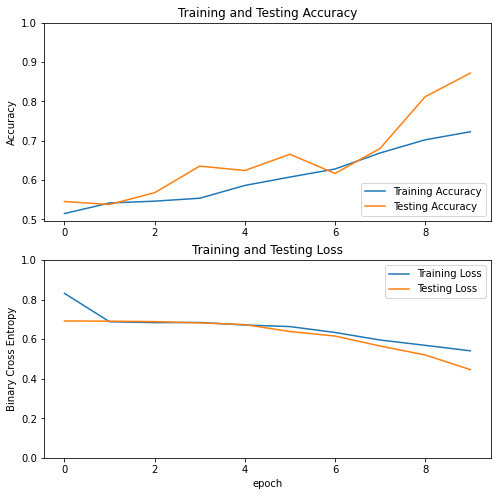

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Testing Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.ylabel('Binary Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Testing Loss')
plt.xlabel('epoch')